## Exploratory Analysis
Clare McNeely


### 1. Import Data

I'm using data scraped from ~18K music reviews on Pitchfork.com, uploaded to [Kaggle](https://www.kaggle.com/nolanbconaway/pitchfork-data).  

In [7]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

con = sqlite3.connect('/Users/206508/Documents/ga_data_science/database.sqlite')
all_reviews = pd.read_sql('SELECT * FROM reviews', con)
c = pd.read_sql('SELECT * FROM content', con)
g = pd.read_sql('SELECT * FROM genres', con)
con.close()

In [8]:
all_reviews.head()

reviewid                 title            artist  \
0     22703             mezzanine    massive attack   
1     22721          prelapsarian          krallice   
2     22659  all of them naturals      uranium club   
3     22661           first songs  kleenex, liliput   
4     22725             new start              taso   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
4  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe camp               contributor  2017-01-07            5        7   
2  david glickman               contributor  2017-01-07            5        7   
3      jenn pelly  associate reviews editor  2017-01-06            4        6   
4    kevin lozano        tracks coordinator  2017-01-06            4        6   

   pub_month  pub_year  
0          1      2017  
1          1      2017  
2          1      2017  
3          1      2017  
4          1      2017

In [9]:
all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
reviewid          18393 non-null int64
title             18393 non-null object
artist            18393 non-null object
url               18393 non-null object
score             18393 non-null float64
best_new_music    18393 non-null int64
author            18393 non-null object
author_type       14487 non-null object
pub_date          18393 non-null object
pub_weekday       18393 non-null int64
pub_day           18393 non-null int64
pub_month         18393 non-null int64
pub_year          18393 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [10]:
g.head()

reviewid       genre
0     22703  electronic
1     22721       metal
2     22659        rock
3     22661        rock
4     22725  electronic

In [11]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 2 columns):
reviewid    22680 non-null int64
genre       20313 non-null object
dtypes: int64(1), object(1)
memory usage: 354.4+ KB


In [12]:
c.head()

reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...

### 2. Inspect data and merge together

In [19]:
j = all_reviews.join(g, rsuffix='_')

In [20]:
j.head()

reviewid                 title            artist  \
0     22703             mezzanine    massive attack   
1     22721          prelapsarian          krallice   
2     22659  all of them naturals      uranium club   
3     22661           first songs  kleenex, liliput   
4     22725             new start              taso   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
4  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe camp               contributor  2017-01-07            5        7   
2  david glickman               contributor  2017-01-07            5        7   
3      jenn pelly  associate reviews editor  2017-01-06            4        6   
4    kevin lozano        tracks coordinator  2017-01-06            4        6   

   pub_month  pub_year  reviewid_       genre  
0          1      2017      22703  electronic  
1          1      2017      22721       metal  
2          1      2017      22659        rock  
3          1      2017      22661        rock  
4          1      2017      22725  electronic

In [22]:
del j['reviewid_']
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 14 columns):
reviewid          18393 non-null int64
title             18393 non-null object
artist            18393 non-null object
url               18393 non-null object
score             18393 non-null float64
best_new_music    18393 non-null int64
author            18393 non-null object
author_type       14487 non-null object
pub_date          18393 non-null object
pub_weekday       18393 non-null int64
pub_day           18393 non-null int64
pub_month         18393 non-null int64
pub_year          18393 non-null int64
genre             16440 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 2.0+ MB


Note that genre is null for ~2K reviews. Possible ways to deal with this, if we think that genre is an important field to include in analysis:
* ignore those 2K observations with missing values
* impute those genre values somehow (not sure if this would be worth it, or would provide any additional information)

For now, let's look at genre for the data we do have.

In [64]:
grp = pd.DataFrame(j.groupby(['genre', 'pub_year']).size()).reset_index()
grp = grp.sort(['genre', 'pub_year'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [65]:
grp

genre  pub_year    0
0      electronic      1999   39
1      electronic      2000   54
2      electronic      2001   71
3      electronic      2002  163
4      electronic      2003  163
5      electronic      2004  175
6      electronic      2005  166
7      electronic      2006  176
8      electronic      2007  198
9      electronic      2008  201
10     electronic      2009  223
11     electronic      2010  237
12     electronic      2011  247
13     electronic      2012  189
14     electronic      2013  189
15     electronic      2014  164
16     electronic      2015  192
17     electronic      2016  237
18     electronic      2017    4
19   experimental      1999   26
20   experimental      2000   36
21   experimental      2001   42
22   experimental      2002   68
23   experimental      2003  111
24   experimental      2004   94
25   experimental      2005  100
26   experimental      2006   88
27   experimental      2007   95
28   experimental      2008   82
29   experimental      2009   92
..            ...       ...  ...
137           rap      2007   74
138           rap      2008   68
139           rap      2009   76
140           rap      2010   86
141           rap      2011  101
142           rap      2012  111
143           rap      2013   86
144           rap      2014   93
145           rap      2015  165
146           rap      2016  167
147           rap      2017    5
148          rock      1999   91
149          rock      2000  154
150          rock      2001  204
151          rock      2002  409
152          rock      2003  493
153          rock      2004  510
154          rock      2005  564
155          rock      2006  527
156          rock      2007  551
157          rock      2008  559
158          rock      2009  506
159          rock      2010  501
160          rock      2011  448
161          rock      2012  399
162          rock      2013  392
163          rock      2014  378
164          rock      2015  425
165          rock      2016  387
166          rock      2017    2

[167 rows x 3 columns]

In [29]:
grp.columns = ['genre', 'pub_year', 'review_count']
grp.head()

genre  pub_year  review_count
0  electronic      1999            39
1  electronic      2000            54
2  electronic      2001            71
3  electronic      2002           163
4  electronic      2003           163

In [30]:
grp.pivot(index='pub_year', columns='genre', values='review_count')

genre     electronic  experimental  folk/country  global  jazz  metal  \
pub_year                                                                
1999            39.0          26.0          10.0     2.0   7.0    6.0   
2000            54.0          36.0           8.0     4.0  10.0   12.0   
2001            71.0          42.0          16.0     4.0  13.0   18.0   
2002           163.0          68.0          22.0     8.0  22.0   39.0   
2003           163.0         111.0          40.0     8.0  18.0   34.0   
2004           175.0          94.0          45.0    12.0  11.0   51.0   
2005           166.0         100.0          54.0    18.0  18.0   40.0   
2006           176.0          88.0          44.0    15.0  27.0   48.0   
2007           198.0          95.0          50.0    12.0  22.0   41.0   
2008           201.0          82.0          34.0    16.0  18.0   42.0   
2009           223.0          92.0          37.0    12.0  17.0   44.0   
2010           237.0          93.0          37.0    12.0  11.0   21.0   
2011           247.0          93.0          21.0     8.0  13.0   55.0   
2012           189.0          76.0          17.0     8.0   9.0   46.0   
2013           189.0          79.0          28.0     8.0  11.0   47.0   
2014           164.0          77.0          27.0     9.0  10.0   48.0   
2015           192.0          77.0          41.0     8.0  14.0   60.0   
2016           237.0         123.0          48.0    25.0  38.0   49.0   
2017             4.0           3.0           NaN     NaN   NaN    1.0   

genre     pop/r&b    rap   rock  
pub_year                         
1999         11.0   11.0   91.0  
2000         17.0   20.0  154.0  
2001         28.0   29.0  204.0  
2002         54.0   57.0  409.0  
2003         42.0   52.0  493.0  
2004         78.0   55.0  510.0  
2005         64.0   47.0  564.0  
2006         75.0   76.0  527.0  
2007         80.0   74.0  551.0  
2008         94.0   68.0  559.0  
2009         87.0   76.0  506.0  
2010         91.0   86.0  501.0  
2011         75.0  101.0  448.0  
2012         76.0  111.0  399.0  
2013         72.0   86.0  392.0  
2014         79.0   93.0  378.0  
2015        110.0  165.0  425.0  
2016        126.0  167.0  387.0  
2017          NaN    5.0    2.0

We have records for all genres in every year, except 2017. It seems that since the data was scraped in early 2017, only a few reviews were captured from that year. For visualizing the data, let's ignore 2017 for now.

In [31]:
grp = grp[grp.pub_year != 2017]

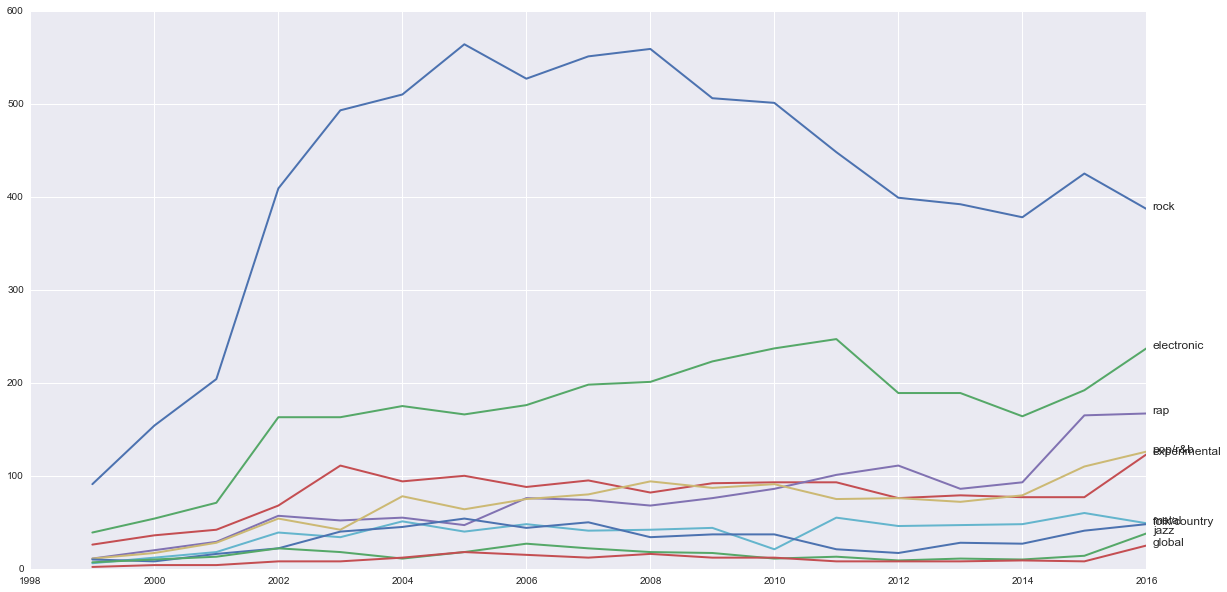

In [33]:
genre_list = j.genre.value_counts().index.tolist()

%matplotlib inline

years = range(1999, 2017)
plt.figure(figsize=(20,10))
for i in genre_list:
    y_values = grp.review_count[grp['genre'] == i]
    plt.plot(years, y_values, lw = 2)
    plt.text(2016 + .1, y_values.iloc[-1], i, size = 12)
    

plt.show()

Genre counts have been remarkably consistent over time, with "rock" music consistently being more reviewed than any other genre.

Have median scores changed over time?

In [69]:
grp = pd.DataFrame(j.groupby(['genre', 'pub_year']).median().iloc[:,1:2]).reset_index()
grp = grp.sort(['genre', 'pub_year'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [70]:
grp

genre  pub_year  score
0      electronic      1999   7.60
1      electronic      2000   7.30
2      electronic      2001   7.40
3      electronic      2002   7.20
4      electronic      2003   7.40
5      electronic      2004   7.50
6      electronic      2005   7.30
7      electronic      2006   7.10
8      electronic      2007   7.00
9      electronic      2008   7.20
10     electronic      2009   7.00
11     electronic      2010   7.10
12     electronic      2011   7.20
13     electronic      2012   7.30
14     electronic      2013   7.00
15     electronic      2014   7.25
16     electronic      2015   7.20
17     electronic      2016   7.50
18     electronic      2017   7.85
19   experimental      1999   7.05
20   experimental      2000   7.35
21   experimental      2001   7.10
22   experimental      2002   7.00
23   experimental      2003   7.20
24   experimental      2004   7.70
25   experimental      2005   7.30
26   experimental      2006   7.25
27   experimental      2007   7.20
28   experimental      2008   7.05
29   experimental      2009   7.05
..            ...       ...    ...
137           rap      2007   7.40
138           rap      2008   7.40
139           rap      2009   7.05
140           rap      2010   7.30
141           rap      2011   7.40
142           rap      2012   7.40
143           rap      2013   7.00
144           rap      2014   7.30
145           rap      2015   7.20
146           rap      2016   7.20
147           rap      2017   7.10
148          rock      1999   7.00
149          rock      2000   7.20
150          rock      2001   7.70
151          rock      2002   7.20
152          rock      2003   7.30
153          rock      2004   7.50
154          rock      2005   7.30
155          rock      2006   7.20
156          rock      2007   7.10
157          rock      2008   7.20
158          rock      2009   7.00
159          rock      2010   7.20
160          rock      2011   7.30
161          rock      2012   7.10
162          rock      2013   7.25
163          rock      2014   7.20
164          rock      2015   7.20
165          rock      2016   7.30
166          rock      2017   8.15

[167 rows x 3 columns]

In [71]:
grp.columns = ['genre', 'pub_year', 'median_score']
grp.head()

genre  pub_year  median_score
0  electronic      1999           7.6
1  electronic      2000           7.3
2  electronic      2001           7.4
3  electronic      2002           7.2
4  electronic      2003           7.4

In [72]:
grp.pivot(index='pub_year', columns='genre', values='median_score')

genre     electronic  experimental  folk/country  global  jazz  metal  \
pub_year                                                                
1999            7.60          7.05          5.85    5.80  7.30   6.75   
2000            7.30          7.35          6.35    7.55  8.15   7.45   
2001            7.40          7.10          7.65    8.25  7.40   7.85   
2002            7.20          7.00          7.05    7.45  7.25   7.20   
2003            7.40          7.20          7.10    7.25  6.55   7.80   
2004            7.50          7.70          7.40    5.75  6.90   7.50   
2005            7.30          7.30          7.30    7.65  7.55   7.55   
2006            7.10          7.25          7.20    7.20  7.50   7.20   
2007            7.00          7.20          7.20    6.85  7.00   7.40   
2008            7.20          7.05          7.50    6.75  7.00   6.90   
2009            7.00          7.05          7.20    6.85  6.90   7.20   
2010            7.10          7.30          7.30    7.80  6.60   7.20   
2011            7.20          7.00          7.30    7.40  7.50   7.40   
2012            7.30          7.25          7.20    6.70  7.50   7.25   
2013            7.00          7.40          7.20    7.45  7.40   7.10   
2014            7.25          7.30          7.70    6.80  7.25   7.30   
2015            7.20          7.20          7.00    6.95  7.05   7.25   
2016            7.50          7.30          7.50    6.90  7.30   7.40   
2017            7.85          7.70           NaN     NaN   NaN   7.90   

genre     pop/r&b   rap  rock  
pub_year                       
1999         7.50  6.80  7.00  
2000         6.80  6.30  7.20  
2001         6.95  7.20  7.70  
2002         7.05  6.90  7.20  
2003         7.10  7.60  7.30  
2004         7.40  7.30  7.50  
2005         7.15  7.30  7.30  
2006         7.40  7.20  7.20  
2007         7.25  7.40  7.10  
2008         7.20  7.40  7.20  
2009         7.30  7.05  7.00  
2010         7.30  7.30  7.20  
2011         7.20  7.40  7.30  
2012         7.00  7.40  7.10  
2013         7.25  7.00  7.25  
2014         7.20  7.30  7.20  
2015         7.15  7.20  7.20  
2016         7.45  7.20  7.30  
2017          NaN  7.10  8.15

In [73]:
grp = grp[grp.pub_year != 2017]

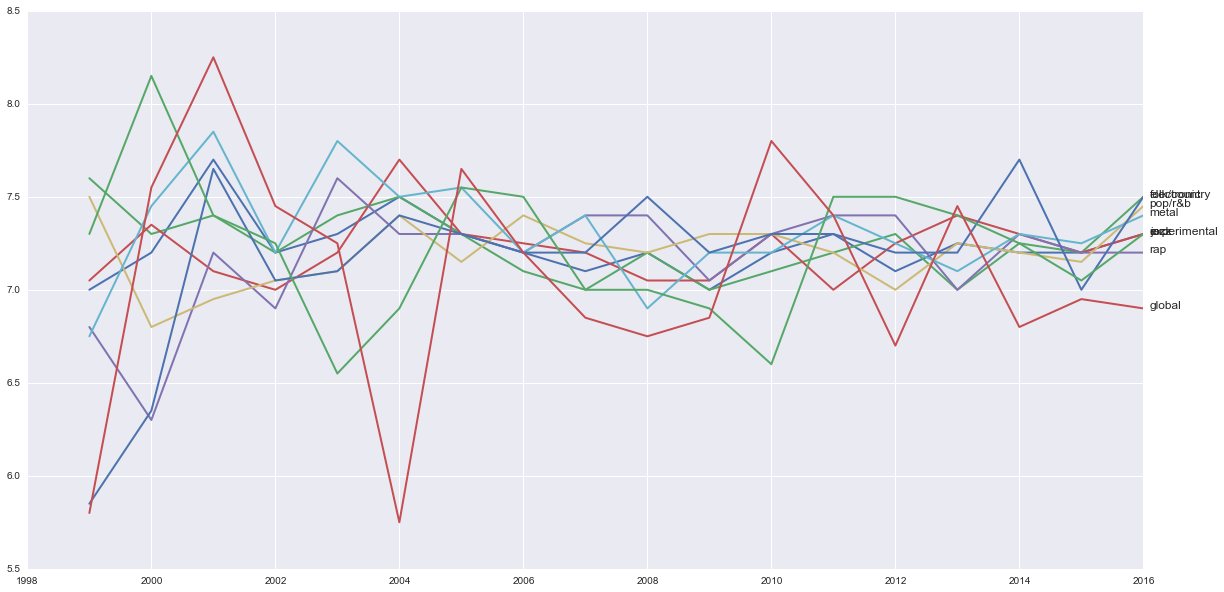

In [75]:
genre_list = j.genre.value_counts().index.tolist()

%matplotlib inline

years = range(1999, 2017)
plt.figure(figsize=(20,10))
for i in genre_list:
    y_values = grp.median_score[grp['genre'] == i]
    plt.plot(years, y_values, lw = 2)
    plt.text(2016 + .1, y_values.iloc[-1], i, size = 12)
    

plt.show()

With some abberations in early years (likely due to small sample size), median yearly scores consistently hovered between 7 and 7.5.

What does the distribution of scores by genre look like?

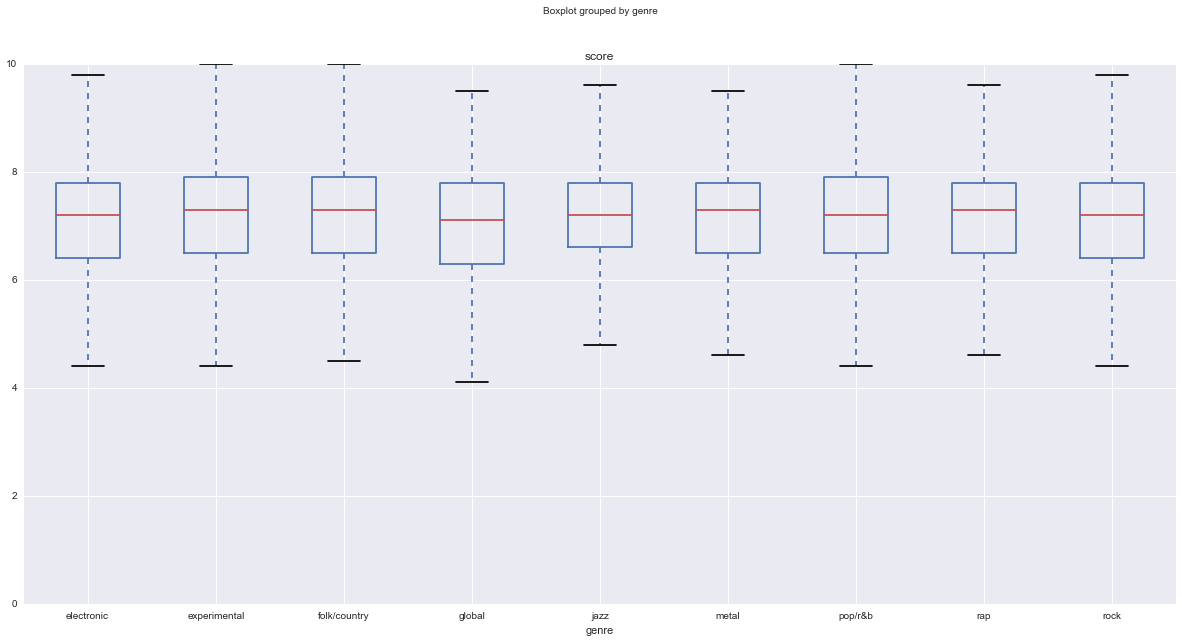

In [59]:
j.boxplot(column='score', by='genre', figsize=(20,10))

It's very consistently distributed by genre.

Are some review authors harsher than others?

In [76]:
x = j.groupby(['author']).median().reset_index()

In [86]:
top = pd.DataFrame(j['author'].value_counts()[:50])
top

author
joe tangari              816
stephen m. deusner       725
ian cohen                699
brian howe               500
mark richardson          476
stuart berman            445
marc hogan               439
nate patrin              347
marc masters             312
jayson greene            299
grayson currin           289
brandon stosuy           288
matthew murphy           274
jess harvell             273
dominique leone          273
andrew gaerig            270
jason crock              268
rob mitchum              267
andy beta                250
paul thompson            222
joshua klein             217
larry fitzmaurice        217
chris dahlen             214
nick neyland             211
adam moerder             209
philip sherburne         209
tom breihan              208
amanda petrusich         200
matt lemay               196
ryan dombal              174
mike powell              160
david raposa             155
zach kelly               153
sam ubl                  152
nitsuh abebe             144
grayson haver currin     136
eric harvey              136
mark richard-san         135
william bowers           129
douglas wolk             128
eric carr                128
nick sylvester           125
scott plagenhoef         123
paul cooper              120
lindsay zoladz           117
jason heller             112
joe colly                109
joshua love              107
mark pytlik              106
laura snapes             104

In [87]:
xj = x.join(top, on='author', rsuffix = 'R').dropna()
len(xj)

50

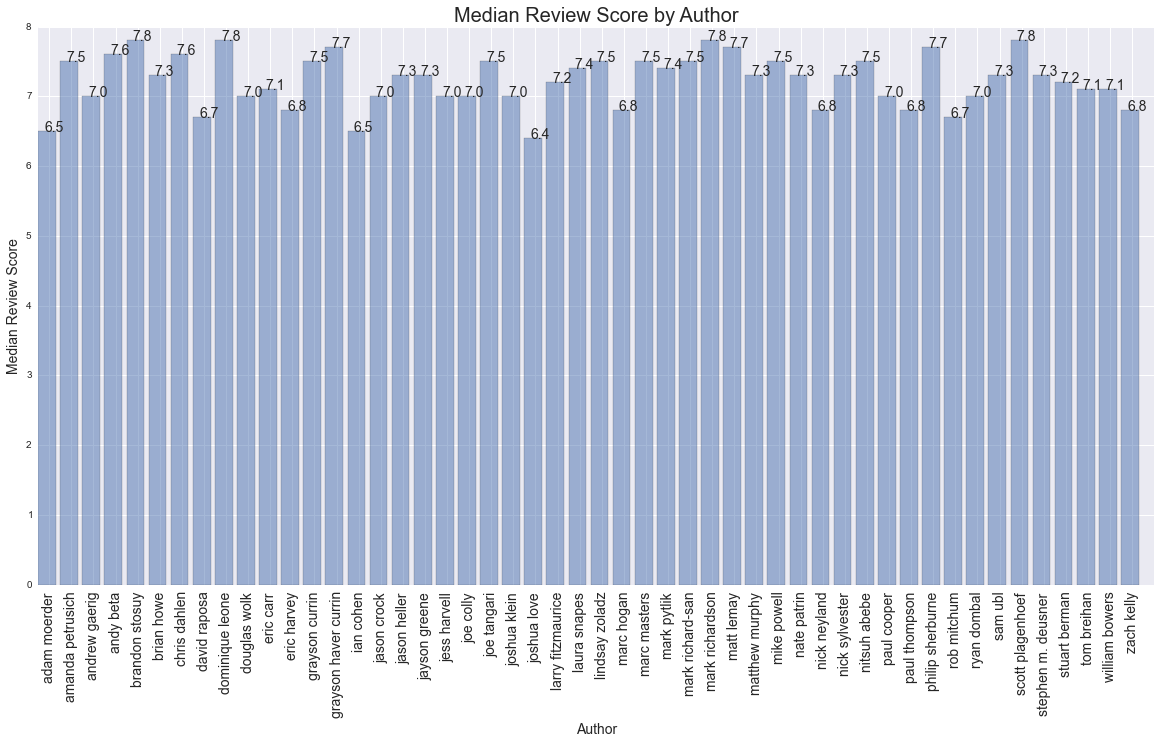

In [88]:
plt.figure(figsize=(20,10))
authors = xj['author'].tolist()
y_pos = range(0, len(xj))
score = xj['score']
    
plt.bar(y_pos, score, alpha=0.5)
plt.xticks(np.arange(0.5, len(xj) + 0.5), authors, rotation = 'vertical', size = 14)
plt.xlim(0, len(xj)+.5)
#plt.ylim(0, .0085)

for i in range(0, len(xj)):
    plt.text(i + 0.3, xj['score'].iloc[i] + .0005, round((xj['score'].iloc[i]),1), size = 14)

    
plt.xlabel('Author', size = 14)
plt.ylabel('Median Review Score', size = 14)
plt.title('Median Review Score by Author', size = 20)

plt.show()

Among the most prolific reviewers, there is some variation in median review score.

What score is typically associated with the "Best New Music" label?

In [94]:
j.boxplot(column='score', by='best_new_music', figsize=(20,10))